/home/sann_htet/Desktop/Computer_Science_and_AI/AI/Dive_into_deep_learning/.venv/lib/python3.12/site-packages/torch/cuda/__init__.py:734: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


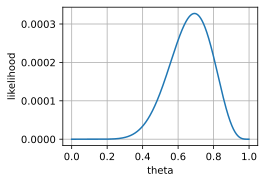

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

theta = torch.arange(0, 1, 0.001)
p = theta**9 * (1 - theta)**4.

d2l.plot(theta, p, 'theta', 'likelihood')

### Numerical Optimization and the Negative Log-Likelihood

In [2]:
# Set up our data
n_H = 8675309
n_T = 256245

# Initialize our parameters
theta = torch.tensor(0.5, requires_grad=True)

# Perform gradient descent
lr = 1e-9
for iter in range(100):
    loss = -(n_H * torch.log(theta) + n_T * torch.log(1 - theta))
    loss.backward()
    with torch.no_grad():
        theta -= lr * theta.grad
    theta.grad.zero_()

# Check output
theta, n_H / (n_H + n_T)

(tensor(0.9713, requires_grad=True), 0.9713101437890875)

## Distributions

In [3]:
%matplotlib inline
from math import erf, factorial
import torch
from IPython import display
from d2l import torch as d2l

torch.pi = torch.acos(torch.zeros(1)) * 2 # Define pi in torch

### Bernoulli

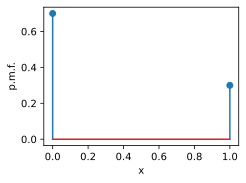

In [7]:
p = 0.3

d2l.set_figsize()
d2l.plt.stem([0, 1], [1 - p, p])
d2l.plt.xlabel('x')
d2l.plt.ylabel('p.m.f.')
d2l.plt.show()

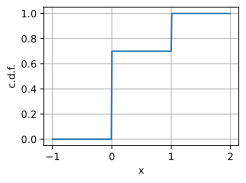

In [8]:
x = torch.arange(-1, 2, 0.01)

def F(x):
    return 0 if x < 0 else 1 if x > 1 else 1 - p

d2l.plot(x, torch.tensor([F(y) for y in x]), 'x', 'c.d.f.')

We can sample an array of arbitrary shape from a Bernoulli random variable.

In [10]:
1*(torch.rand(10, 10) < p)

tensor([[0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 0, 0, 0, 1, 1],
        [1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [1, 0, 0, 0, 1, 0, 1, 0, 1, 1],
        [1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 1, 1, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 1, 0, 1, 0, 0]])

### Discrete Uniform

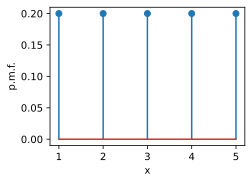

In [11]:
n = 5

d2l.plt.stem([i+1 for i in range(n)], n*[1 / n])
d2l.plt.xlabel('x')
d2l.plt.ylabel('p.m.f.')
d2l.plt.show()

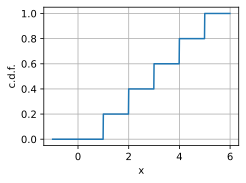

In [13]:
x = torch.arange(-1, 6, 0.01)

def F(x):
    return 0 if x < 1 else 1 if x > n else torch.floor(x) / n

d2l.plot(x, torch.tensor([F(y) for y in x]), 'x', 'c.d.f.')

We can sample an array of arbitrary shape from a discrete uniform random variable.

In [14]:
torch.randint(1, n, size=(10, 10))

tensor([[1, 4, 2, 1, 3, 2, 4, 2, 3, 3],
        [2, 4, 2, 1, 3, 1, 1, 4, 3, 1],
        [2, 2, 4, 3, 3, 4, 1, 4, 1, 3],
        [2, 3, 1, 2, 2, 3, 1, 1, 1, 4],
        [1, 1, 2, 3, 2, 3, 3, 2, 3, 2],
        [2, 4, 2, 4, 4, 2, 4, 3, 1, 3],
        [2, 3, 4, 4, 4, 2, 2, 3, 4, 2],
        [2, 1, 3, 3, 1, 3, 1, 1, 4, 3],
        [4, 3, 1, 1, 2, 1, 2, 3, 3, 1],
        [2, 3, 1, 2, 3, 3, 2, 4, 1, 4]])

### Continuous Uniform

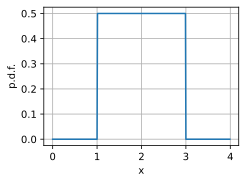

In [15]:
a, b = 1, 3

x = torch.arange(0, 4, 0.01)
p = (x > a).type(torch.float32)*(x < b).type(torch.float32)/(b-a)
d2l.plot(x, p, 'x', 'p.d.f.')

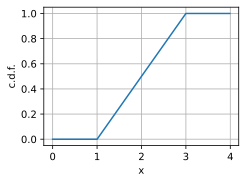

In [18]:
def F(x):
    return 0 if x < a else 1 if x > b else (x - a) / (b - a)

d2l.plot(x, torch.tensor([F(y) for y in x]), 'x', 'c.d.f.')

We can sample an array of arbitrary shape from a uniform random variable.

In [19]:
(b - a) * torch.rand(10, 10) + a

tensor([[1.5493, 2.0133, 1.9042, 1.5201, 1.6101, 1.1613, 2.1071, 1.9361, 2.0520,
         2.3032],
        [1.8677, 1.5123, 1.5417, 1.9748, 2.4595, 2.2539, 1.4829, 2.5660, 1.2066,
         2.5530],
        [2.2427, 2.9977, 1.9354, 1.1753, 1.7678, 1.7720, 2.8836, 1.1399, 2.7704,
         2.7193],
        [1.0201, 2.9208, 2.3962, 2.1182, 2.9377, 2.0991, 1.5945, 1.3858, 2.2374,
         1.1014],
        [2.7433, 2.8047, 1.2455, 1.6695, 2.5716, 1.1122, 1.4766, 1.1271, 2.0078,
         2.3890],
        [2.0202, 1.9470, 2.6325, 2.3681, 1.1163, 1.5943, 1.8444, 2.9495, 1.1273,
         2.8931],
        [2.3307, 1.4732, 2.5704, 1.8544, 2.3465, 2.1497, 2.8985, 1.8464, 2.6002,
         1.1802],
        [1.9438, 1.3797, 2.1198, 2.0129, 2.1665, 1.7147, 2.0511, 2.2483, 1.4811,
         1.3386],
        [1.5186, 2.0755, 2.3874, 2.5725, 1.0743, 1.9082, 1.0673, 2.0820, 1.7113,
         1.8500],
        [1.0478, 2.5332, 1.4730, 1.1553, 2.9912, 2.2038, 1.7869, 2.5686, 1.4088,
         1.3145]])